In [1]:
import numpy as np
from qiskit import QuantumCircuit

np.random.seed(1)

parBit = np.random.randint(2, size=2) 

print(parBit)


[1 1]


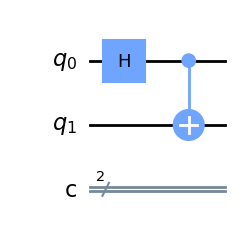

In [2]:
circ = QuantumCircuit(2,2)

circ.h(0)
circ.cx(0,1)

circ.draw('mpl')

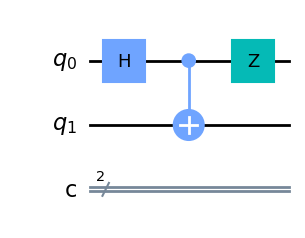

In [3]:
if(parBit[0] == 0 and parBit[1] == 0):
    circ.id(0)
elif(parBit[0] == 0 and parBit[1] == 1):
    circ.x(0)
elif(parBit[0] == 1 and parBit[1] == 0):
    circ.y(0)
elif(parBit[0] == 1 and parBit[1] == 1):
    circ.z(0)

circ.draw('mpl')

In [4]:
circ.cx(0,1)
circ.h(0)
circ.measure(1,1)
circ.measure(0,0)

circ.draw()

┌───┐     ┌───┐     ┌───┐┌─┐
q_0: ┤ H ├──■──┤ Z ├──■──┤ H ├┤M├
     └───┘┌─┴─┐└───┘┌─┴─┐└┬─┬┘└╥┘
q_1: ─────┤ X ├─────┤ X ├─┤M├──╫─
          └───┘     └───┘ └╥┘  ║ 
c_0: ══════════════════════╬═══╩═
                           ║     
c_1: ══════════════════════╩═════

In [5]:
# Import Aer
from qiskit import Aer
from qiskit import transpile

# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend_sim.run(transpile(circ, backend_sim), shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()



In [6]:
counts = result_sim.get_counts(circ)
print(counts)

{'01': 1024}
